# Stream Gauge USGS Plot for Stehekin Flooding Assignment

In [1]:
# Christina Stuhl
# 1/14/2026
# ESS 469: Stehekin Flooding Assignment
# Group: Submarine Volcanoes

## Dependencies

In [2]:
#importing dependencies for the program
import requests
import pandas as pd
import matplotlib.pyplot as plt

## API pull

In [3]:
# API key for data
#Parameters taken from the USGS API guide
URL = (
    "https://api.waterdata.usgs.gov/ogcapi/v0/collections/daily/items"
    "?f=json"
    "&skipGeometry=TRUE"
    "&limit=50000"
    "&monitoring_location_id=USGS-12451000" # Stehekin monitoring station
    "&parameter_code=00060"
    "&statistic_id=00003"
    "&time=2025-12-01/2025-12-31" #date parameters
)

#API key for USGS water data (requested)
API = {
    "X-Api-Key": "3L9RlWbA10ET1RcmwZosC6TxYZDCUeGGmglPLzFq"
}

#Retrieving the URL with the data using the API key provided as a header parameter
r = requests.get(URL, headers=API, timeout=60)
#USGS formats using json
stehekin_discharge = r.json()

## Recall the discharge measurments and the time

In [4]:
# retrieving the features = properties of the measurment
features = stehekin_discharge.get("features", [])
# Retrieve "time" and cfs ("value") 
rows = []
for f in features:
    props = f.get("properties", {})
    rows.append({
        "time": props.get("time"),
        "value": props.get("value"),
    })


## Make dataframe

In [5]:
# generating the dataframe for the stream gauge
#cfs_df = cubic feet/second data frame
cfs_df = pd.DataFrame(rows)
cfs_df["time"] = pd.to_datetime(cfs_df["time"])
cfs_df["value"] = pd.to_numeric(cfs_df["value"])
cfs_df = cfs_df.dropna().sort_values("time")

## Stehekin River Discharge Plot

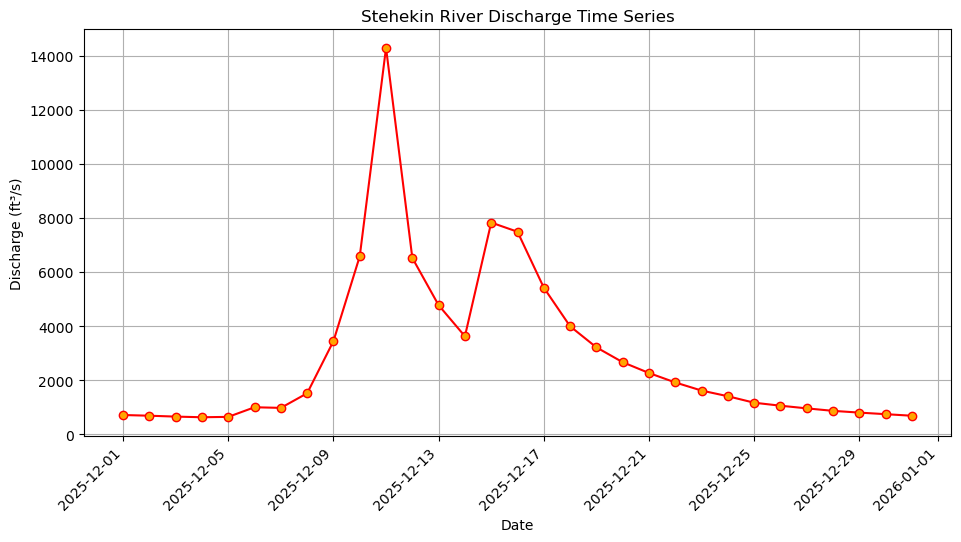

In [6]:
#generating plot
plt.figure(figsize = (10,5))
plt.plot(cfs_df["time"], cfs_df["value"], marker = "o", color = "red", markerfacecolor='orange')
plt.xlabel("Date")
plt.ylabel("Discharge (ft\u00b3/s)")
plt.title("Stehekin River Discharge Time Series")
plt.grid(True)
plt.tight_layout()

#initial ticks were too close together and too long
plt.xticks(rotation = 45, ha = "right")
plt.savefig("stehekin_discharge.png", dpi=300)
plt.show()